<a href="https://colab.research.google.com/github/rowenhama/Tesla-Stock-Price-Prediction/blob/main/Tesla_Stock_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#installing dependencies
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [4]:
#load the data
from google.colab import files
uploaded = files.upload()

Saving Tesla.csv.csv to Tesla.csv.csv


In [5]:
#store the data into a data frame
df = pd.read_csv('Tesla.csv.csv')
df.head(7)

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
5,7/7/2010,16.400000,16.629999,14.980000,15.800000,6921700,15.800000
6,7/8/2010,16.139999,17.520000,15.570000,17.459999,7711400,17.459999


In [6]:
#get the number of trading days
df.shape

(1692, 7)

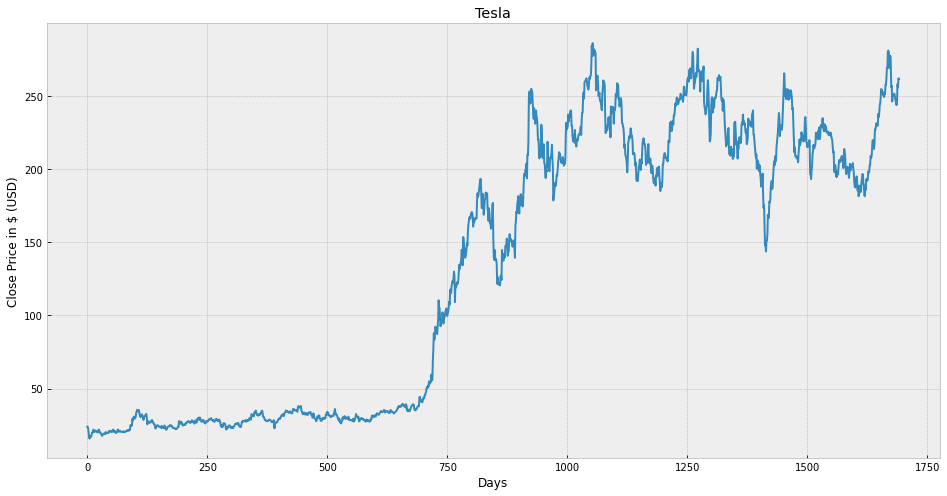

In [7]:
#visualise close price data
plt.figure(figsize=(16,8))
plt.title('Tesla')
plt.xlabel('Days')
plt.ylabel('Close Price in $ (USD)')
#plt.axis([0, 50, 0, 20])
plt.plot(df['Close'])
plt.show()

In [8]:
#getting close price only
df = df[['Close']]
df.head(7)

,Close
0,23.889999
1,23.830000
2,21.959999
3,19.200001
4,16.110001
5,15.800000
6,17.459999


In [9]:
#create a variable to predict 'x' days out in the future
future_days = 25
#new column (target data)
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(7)

,Close,Prediction
1685,244.899994,NaN
1686,243.690002,NaN
1687,246.169998,NaN
1688,258.000000,NaN
1689,255.729996,NaN
1690,262.049988,NaN
1691,261.500000,NaN


In [10]:
#Create the feature dataset 'X' and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[ 23.889999]
 [ 23.83    ]
 [ 21.959999]
 ...
 [257.480011]
 [262.079987]
 [269.200012]]


In [11]:
#create a target dataset (y) and convert it to a numpy array and get all the target values except the last 'x' rows
y = np.array(df['Prediction'])[:-future_days]
print(y)

[ 21.26      20.450001  19.59     ... 255.729996 262.049988 261.5     ]


In [12]:
#split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X , y, test_size = 0.25)

In [13]:
#create the models
#create the decision tree regrssor model
tree = DecisionTreeRegressor().fit(x_train,y_train)
#create the linear regression model
lr = LinearRegression().fit(x_train,y_train)

In [14]:
#get the last 'x' rows of the feature dataset
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[226.75    ],
       [229.009995],
       [231.279999],
       [229.869995],
       [229.729996],
       [229.589996],
       [237.75    ],
       [235.580002],
       [238.360001],
       [243.759995],
       [244.729996],
       [248.919998],
       [254.610001],
       [254.470001],
       [252.509995],
       [252.949997],
       [250.630005],
       [251.929993],
       [249.240005],
       [251.550003],
       [251.330002],
       [257.769989],
       [257.480011],
       [262.079987],
       [269.200012]])

In [15]:
#show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#show the linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[269.230011  280.600006  280.980011  279.76001   222.3400035 224.820007
 277.390015  273.51001   281.100006  262.51001   246.229996  249.990005
 250.020004  250.479996  251.570007  251.210007  282.26001   246.869995
 244.899994  243.690002  246.169998  258.        222.259995  211.720001
 266.149994 ]

[227.1706521  229.36254571 231.56414671 230.19663096 230.06085061
 229.92506929 237.83918442 235.7345759  238.430804   243.66807769
 244.60884924 248.67259213 254.19113585 254.05535453 252.15441022
 252.58115345 250.33107076 251.59188567 248.98295622 251.22334607
 251.00997445 257.25590258 256.97466261 261.43602558 268.34149984]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


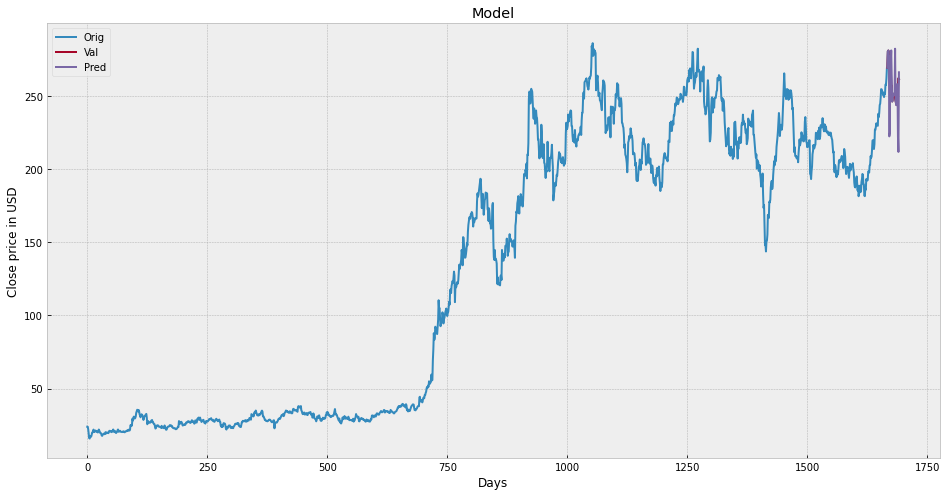

In [21]:
#visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price in USD')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()